# Analyze RiverFlood Hazard from netCDF file

Files: https://files.isimip.org/cama-flood/results/

Help for analyzing netCDF files: https://github.com/Unidata/netcdf4-python/blob/master/examples/reading_netCDF.ipynb

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import netCDF4
fp_flddph='../Climada_Data/flddph_150arcsec_clm40_gswp3_0.nc'
nc_flddph = netCDF4.Dataset(fp_flddph)
fp_fldfrc='../Climada_Data/fldfrc_150arcsec_clm40_gswp3_0.nc'
nc_fldfrc = netCDF4.Dataset(fp_fldfrc)

In [4]:
print(nc_flddph)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    created_with: https://github.com/swillner/flood-processing by S. Willner
    citation: https://doi.org/10.5281/zenodo.1241051
    flood_processing_version: 1.0.88-g0dd6209
    created_at: 2020-02-18 09:22:09
    contact: sven.willner@pik-potsdam.de
    discharge_threshold: 0.1mm/d
    ensemble_name: isimip2a
    fit: gev
    climate: gswp3
    ghm: clm40
    protection_threshold: 0
    cama_flood_version: 3.6.2
    bias_correction: ewembi
    soc: nosoc
    fit_soc: nosoc
    dimensions(sizes): time(40), lat(4320), lon(8640)
    variables(dimensions): float64 time(time), float64 lat(lat), float64 lon(lon), float32 flddph(time, lat, lon)
    groups: 


In [5]:
print(nc_flddph.variables.keys())

dict_keys(['time', 'lat', 'lon', 'flddph'])


In [6]:
for d in nc_flddph.dimensions.items():
    print(d)

('time', <class 'netCDF4._netCDF4.Dimension'>: name = 'time', size = 40)
('lat', <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 4320)
('lon', <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 8640)


In [7]:
time = nc_flddph.variables['time']
print(time)

<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    axis: T
    bounds: time_bnds
    calendar: standard
    long_name: time
    standard_name: time
    units: seconds since 1971-01-01 00:00
unlimited dimensions: 
current shape = (40,)
filling on, default _FillValue of 9.969209968386869e+36 used


In [8]:
time[:]

masked_array(data=[1.58111990e+07, 4.73903990e+07, 7.89695990e+07,
                   1.10505599e+08, 1.42041599e+08, 1.73620799e+08,
                   2.05199999e+08, 2.36735999e+08, 2.68271999e+08,
                   2.99851199e+08, 3.31430399e+08, 3.62966399e+08,
                   3.94502399e+08, 4.26081599e+08, 4.57660799e+08,
                   4.89196799e+08, 5.20732799e+08, 5.52311999e+08,
                   5.83891199e+08, 6.15427199e+08, 6.46963199e+08,
                   6.78542399e+08, 7.10121599e+08, 7.41657599e+08,
                   7.73193599e+08, 8.04772799e+08, 8.36351999e+08,
                   8.67887999e+08, 8.99423999e+08, 9.31003199e+08,
                   9.62582399e+08, 9.94118399e+08, 1.02565440e+09,
                   1.05723360e+09, 1.08881280e+09, 1.12034880e+09,
                   1.15188480e+09, 1.18346400e+09, 1.21504320e+09,
                   1.24657920e+09],
             mask=False,
       fill_value=1e+20)

In [9]:
lat = nc_flddph.variables['lat']
lon = nc_flddph.variables['lon']
flddph = nc_flddph.variables['flddph']

In [10]:
print(flddph.dimensions)

('time', 'lat', 'lon')


In [11]:
print('shape of flddph variable: %s' % repr(flddph.shape))
flddphslice = flddph[time[:] > 0, lat[:] > 88, lon[:] > 178]
print('shape of flddph slice: %s' % repr(flddphslice.shape))

shape of flddph variable: (40, 4320, 8640)
shape of flddph slice: (40, 48, 48)


In [12]:
flddph_year =  flddph[38, :, :]
flddph_year.shape

(4320, 8640)

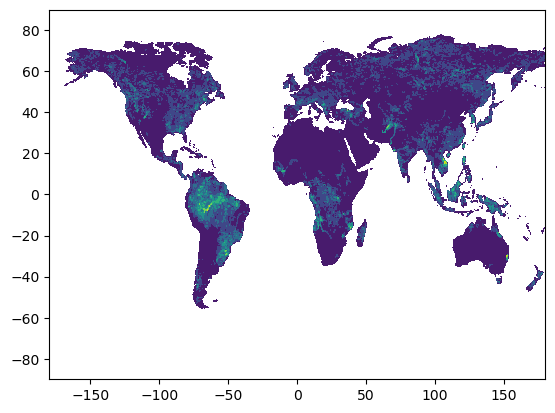

In [13]:
X, Y = np.meshgrid(lon, lat)
cs = plt.contourf(X, Y, flddph_year)

In [14]:
from netCDF4 import num2date, date2num, date2index
print('name of time dimension = %s' % time.dimensions)
print('units = %s' % time.units)
print('values = %s' % time[:])

name of time dimension = time
units = seconds since 1971-01-01 00:00
values = [1.58111990e+07 4.73903990e+07 7.89695990e+07 1.10505599e+08
 1.42041599e+08 1.73620799e+08 2.05199999e+08 2.36735999e+08
 2.68271999e+08 2.99851199e+08 3.31430399e+08 3.62966399e+08
 3.94502399e+08 4.26081599e+08 4.57660799e+08 4.89196799e+08
 5.20732799e+08 5.52311999e+08 5.83891199e+08 6.15427199e+08
 6.46963199e+08 6.78542399e+08 7.10121599e+08 7.41657599e+08
 7.73193599e+08 8.04772799e+08 8.36351999e+08 8.67887999e+08
 8.99423999e+08 9.31003199e+08 9.62582399e+08 9.94118399e+08
 1.02565440e+09 1.05723360e+09 1.08881280e+09 1.12034880e+09
 1.15188480e+09 1.18346400e+09 1.21504320e+09 1.24657920e+09]


In [15]:
dates = num2date(time[:], time.units)
print([date.strftime('%Y-%m-%d %H:%M:%S') for date in dates[:40]]) # print only first ten...

['1971-07-02 23:59:59', '1972-07-02 11:59:59', '1973-07-02 23:59:59', '1974-07-02 23:59:59', '1975-07-02 23:59:59', '1976-07-02 11:59:59', '1977-07-02 23:59:59', '1978-07-02 23:59:59', '1979-07-02 23:59:59', '1980-07-02 11:59:59', '1981-07-02 23:59:59', '1982-07-02 23:59:59', '1983-07-02 23:59:59', '1984-07-02 11:59:59', '1985-07-02 23:59:59', '1986-07-02 23:59:59', '1987-07-02 23:59:59', '1988-07-02 11:59:59', '1989-07-02 23:59:59', '1990-07-02 23:59:59', '1991-07-02 23:59:59', '1992-07-02 11:59:59', '1993-07-02 23:59:59', '1994-07-02 23:59:59', '1995-07-02 23:59:59', '1996-07-02 11:59:59', '1997-07-02 23:59:59', '1998-07-02 23:59:59', '1999-07-02 23:59:59', '2000-07-02 11:59:59', '2001-07-02 23:59:59', '2002-07-02 23:59:59', '2003-07-02 23:59:59', '2004-07-02 11:59:59', '2005-07-02 23:59:59', '2006-07-02 23:59:59', '2007-07-02 23:59:59', '2008-07-02 11:59:59', '2009-07-02 23:59:59', '2010-07-02 23:59:59']


# Create RiverFlood Hazard object from netCDF file

In [16]:
from climada_petals.hazard.river_flood import RiverFlood
from climada.hazard.centroids import Centroids

In [17]:
# generating RiverFlood hazard from netCDF file
rf = RiverFlood.from_nc(countries = ['DEU','ITA'], years=range(1981,1985), dph_path='../Climada_Data/flddph_150arcsec_clm40_gswp3_0.nc', frc_path='../Climada_Data/fldfrc_150arcsec_clm40_gswp3_0.nc')
rf.event_name 

['1981', '1982', '1983', '1984']

resolution: 0.04166666666666667


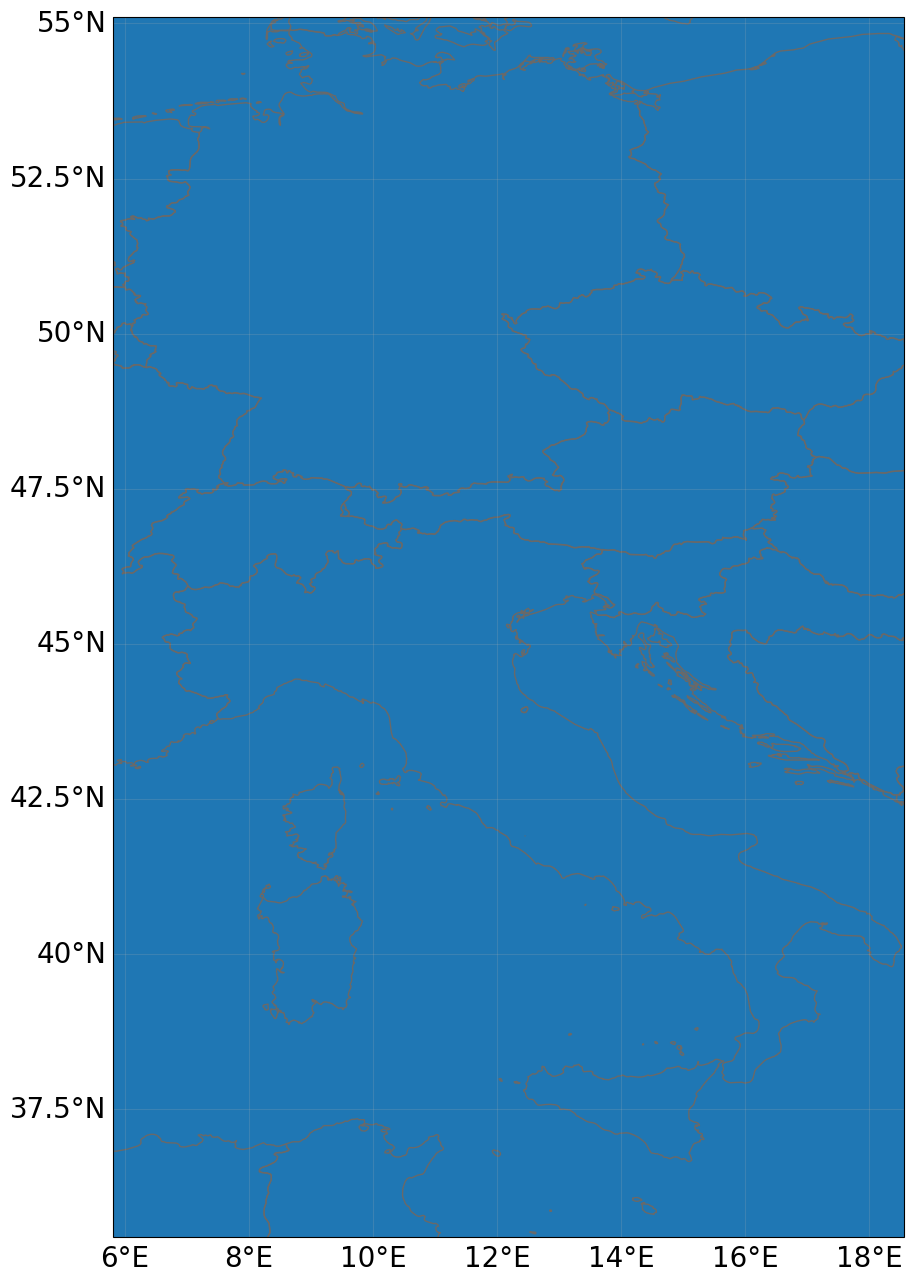

In [18]:
# Locations
# plot centroids:
rf.centroids.plot()
# get resolution
print('resolution:', rf.centroids.meta['transform'][0])

<GeoAxes: title={'center': 'Event ID 4: 1984'}>

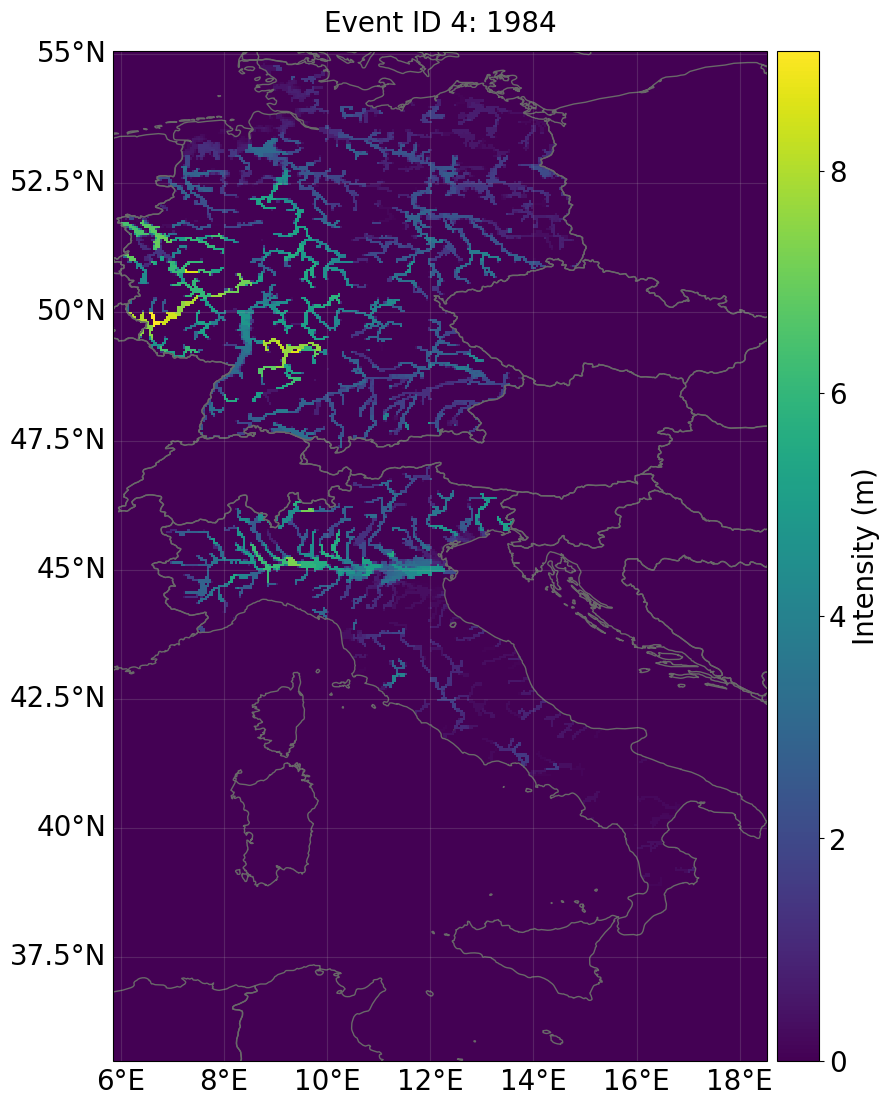

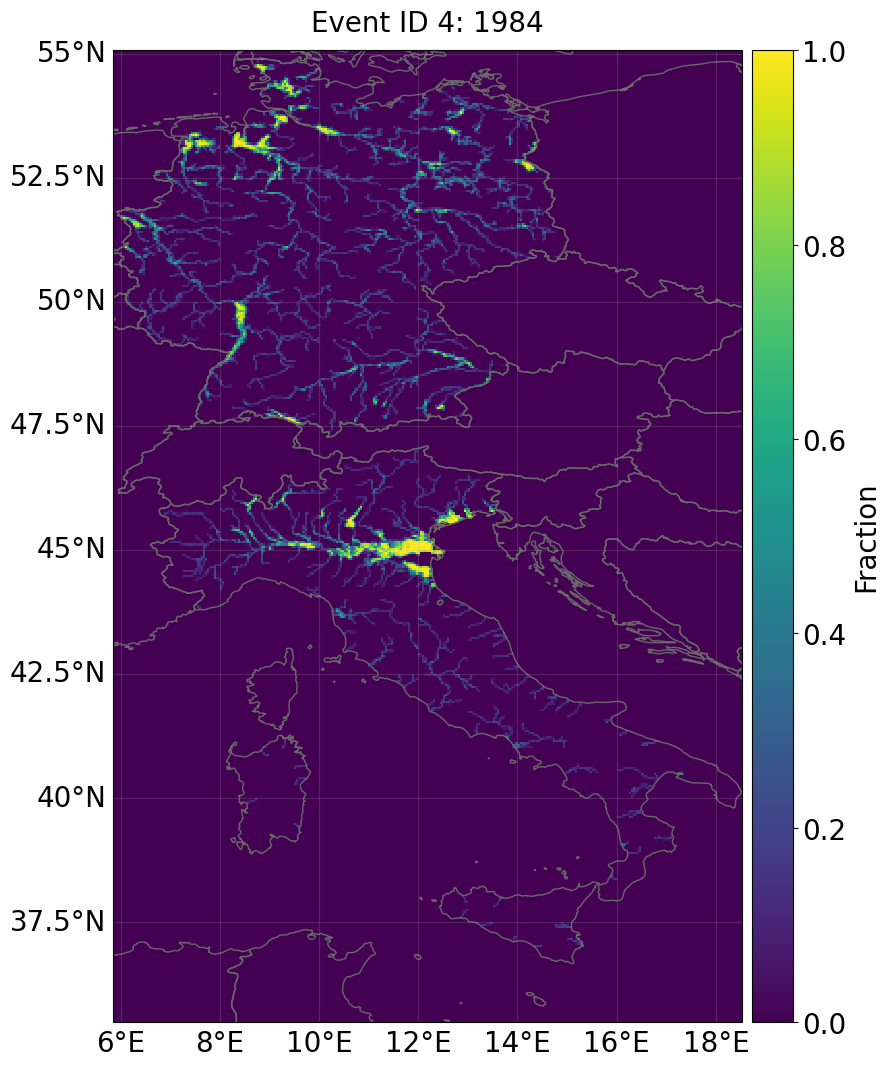

In [19]:
# plotting intensity (Flood depth in m)
# rf.plot_intensity(event=0, smooth = False) #max intensity
rf.plot_intensity(event=4, smooth = False) #year-event 4, 1984 here 
# plotting fraction flooded
rf.plot_fraction(event=4, smooth = False)

# Calculating Flooded Area

In [20]:
# calculating flooded area
rf.set_flooded_area()

print("Total flooded area for year " + str(1981) + " in Germany and Italy:")
print(str(rf.fla_annual[0]) + " m2")

print("Total flooded area for year " + str(1984) + " in Germany and Italy:")
print(str(rf.fla_annual[3]) + " m2")

/Users/arnaudgoussebaile/miniconda3/envs/climada_env/lib/python3.9/site-packages/climada/hazard/centroids/centr.py:873: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  xy_pixels = self.geometry.buffer(res / 2).envelope


Total flooded area for year 1981 in Germany and Italy:
36130601701.50575 m2
Total flooded area for year 1984 in Germany and Italy:
31698916372.112324 m2


# Setting JRC damage functions

<Axes: title={'center': 'RF 3: Flood Europe JRC Residential noPAA'}, xlabel='Intensity (m)', ylabel='Impact (%)'>

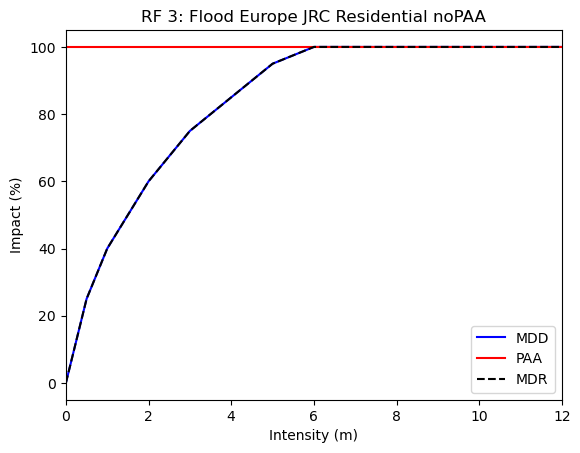

In [21]:
from climada_petals.entity.impact_funcs.river_flood import ImpfRiverFlood,flood_imp_func_set
impf_set = flood_imp_func_set()
impf_EUR = impf_set.get_func(fun_id=3)
impf_EUR[0].plot()

# Deriving flood impact with LitPop exposure

In [22]:
from climada.entity import LitPop
lp_exp = LitPop.from_countries(['DEU','ITA'], fin_mode='pc')
lp_exp.gdf

2024-04-02 17:25:53,935 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2018. Using nearest available year for GPW data: 2020
2024-04-02 17:25:54,000 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2018. Using nearest available year for GPW data: 2020
2024-04-02 17:25:54,066 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2018. Using nearest available year for GPW data: 2020
2024-04-02 17:25:54,130 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2018. Using nearest available year for GPW data: 2020
2024-04-02 17:25:54,181 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2018. Using nearest available year for GPW data: 2020
2024-04-02 17:25:54,229 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2018. Using nearest available year for GPW data: 2020
2024-04-02 17:25:54,262 - climada.entity.exposures.litpop.gpw_populati

,value,latitude,longitude,geometry,region_id,impf_
0,8.346775e+04,53.612500,6.720833,POINT (6.72083 53.61250),276,1
1,1.297375e+05,53.612500,6.729167,POINT (6.72917 53.61250),276,1
2,1.750119e+05,53.612500,6.737500,POINT (6.73750 53.61250),276,1
3,2.138201e+05,53.612500,6.745833,POINT (6.74583 53.61250),276,1
4,2.276009e+05,53.612500,6.754167,POINT (6.75417 53.61250),276,1
...,...,...,...,...,...,...
1139098,4.222600e+06,45.379167,12.337500,POINT (12.33750 45.37917),380,1
1139099,0.000000e+00,45.370833,12.329167,POINT (12.32917 45.37083),380,1
1139100,4.049482e+07,45.370833,12.337500,POINT (12.33750 45.37083),380,1
1139101,1.943336e+05,45.362500,12.329167,POINT (12.32917 45.36250),380,1


,value,latitude,longitude,geometry,region_id,impf_,impf_RF
0,8.346775e+04,53.612500,6.720833,POINT (6.72083 53.61250),276,1,3
1,1.297375e+05,53.612500,6.729167,POINT (6.72917 53.61250),276,1,3
2,1.750119e+05,53.612500,6.737500,POINT (6.73750 53.61250),276,1,3
3,2.138201e+05,53.612500,6.745833,POINT (6.74583 53.61250),276,1,3
4,2.276009e+05,53.612500,6.754167,POINT (6.75417 53.61250),276,1,3
...,...,...,...,...,...,...,...
1139098,4.222600e+06,45.379167,12.337500,POINT (12.33750 45.37917),380,1,3
1139099,0.000000e+00,45.370833,12.329167,POINT (12.32917 45.37083),380,1,3
1139100,4.049482e+07,45.370833,12.337500,POINT (12.33750 45.37083),380,1,3
1139101,1.943336e+05,45.362500,12.329167,POINT (12.32917 45.36250),380,1,3


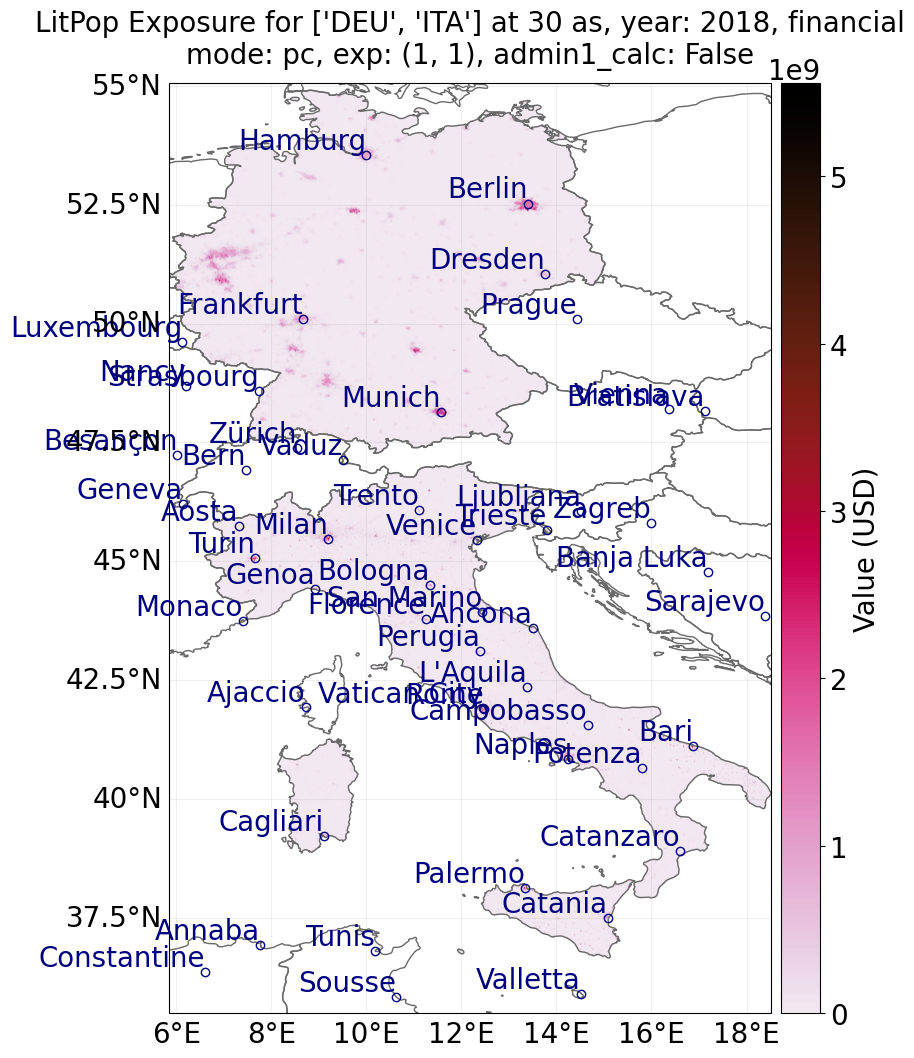

In [23]:
# In the LitPop exposure the damage function for river floods needs
# to be specified manually.
import pandas as pd
from climada_petals.util.constants import RIVER_FLOOD_REGIONS_CSV

info = pd.read_csv(RIVER_FLOOD_REGIONS_CSV)
lp_exp.gdf['impf_RF'] = info.loc[info['ISO']=='DEU','impf_RF'].values[0]
lp_exp
lp_exp.plot_hexbin(pop_name=True);
lp_exp.gdf

2024-04-02 17:26:52,385 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.


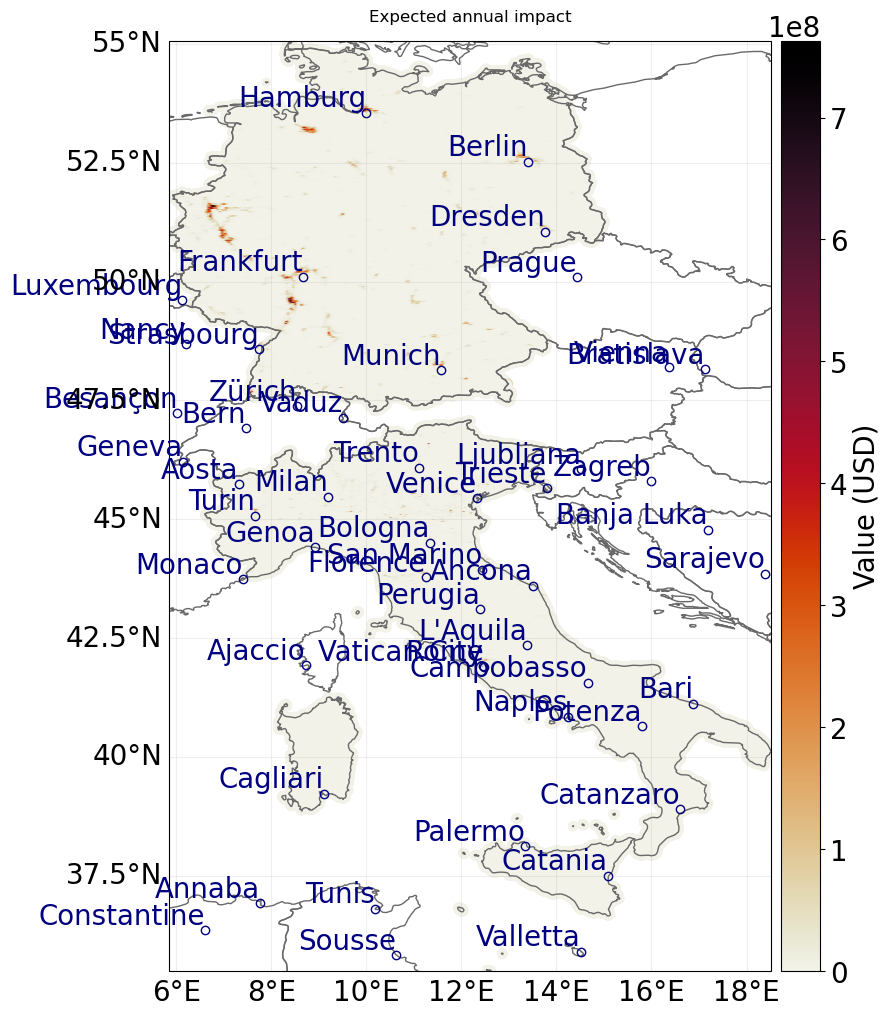

In [24]:
from climada.engine import Impact

imp=Impact()
imp.calc(lp_exp,impf_set,rf,save_mat=True)
imp.plot_scatter_eai_exposure();

In [25]:
imp.event_name

['1981', '1982', '1983', '1984']

In [26]:
imp.frequency

array([0.25, 0.25, 0.25, 0.25])